In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Read the data
df = pd.read_parquet('Package_ML.parquet (1).gzip')

# Filter for specific zip codes
zips = ['37013','37027','37072','37076','37115','37138','37201','37203','37204','37205',
        '37206','37207','37208','37209','37210','37211','37212','37214','37215','37216',
        '37217','37218','37219','37220','37221','37027','37064','37067','37069','37135',
        '37014','37046','37062','37179','37174','37122','37121','37087','37090','37184',
        '37138','37075','37075','37066','37148','37070','37072','37048','37188','37086',
        '37167','37127','37218','37130']
df = df[df['Zip_D'].isin(zips)]
df = df[df['Zip_O'].isin(zips)]

# Handle missing values for weather data
imputer = SimpleImputer(strategy='mean')
weather_cols = ['TMIN_O', 'TMAX_O', 'PRCP_O', 'SNOW_O', 'TMIN_D', 'TMAX_D', 'PRCP_D', 'SNOW_D']
df[weather_cols] = imputer.fit_transform(df[weather_cols])

# Encode categorical variables
df = pd.get_dummies(df, columns=['ServiceTypeCode', 'MailClassCode', 'Zip_O', 'Zip_D'])

# Separate features and target variable
X = df.drop('late', axis=1)
y = df['late']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [2]:
# Model Training and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    print("-" * 50)
    
    return model

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest Regressor")

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost Regressor")



Random Forest Regressor Results:
Mean Squared Error: 0.0830
R-squared Score: 0.4795
--------------------------------------------------
XGBoost Regressor Results:
Mean Squared Error: 0.0804
R-squared Score: 0.4956
--------------------------------------------------


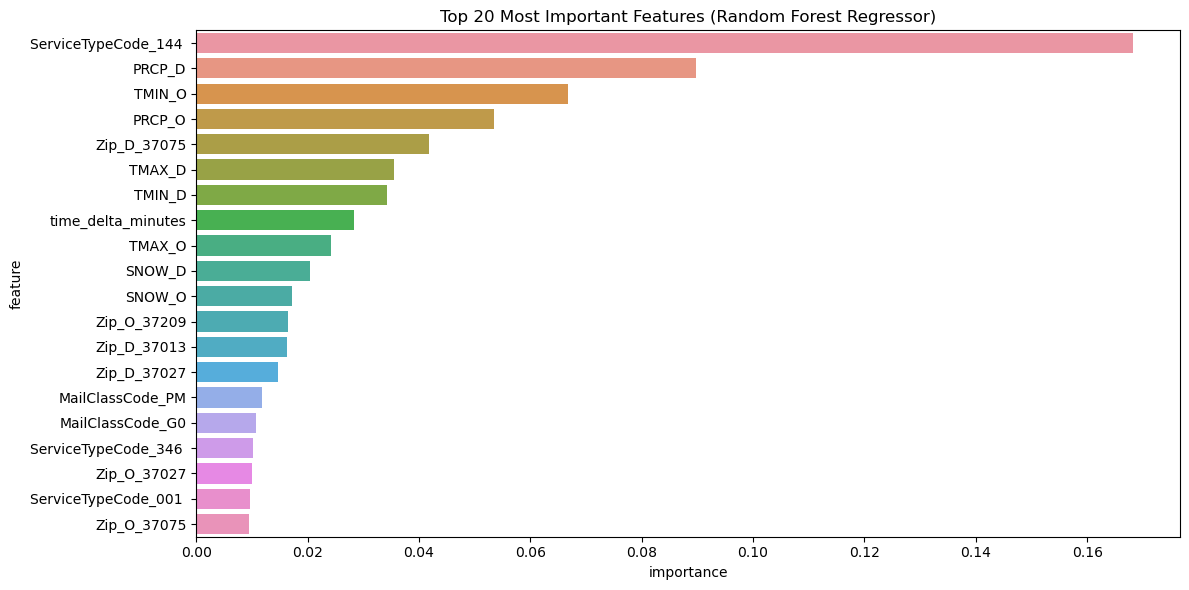

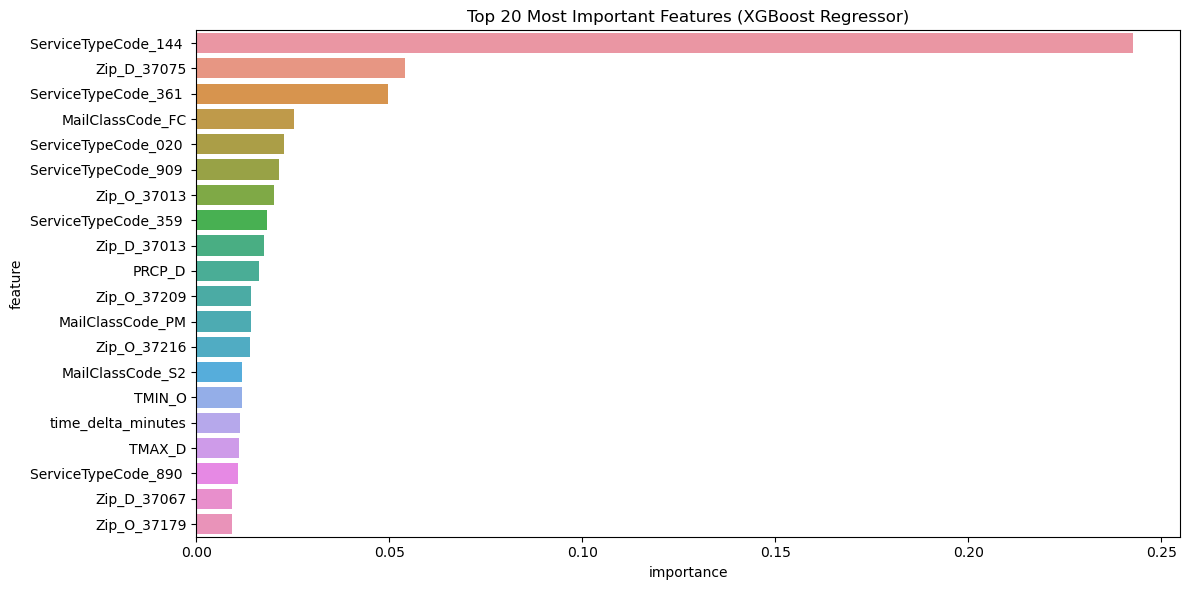

In [3]:
# Cell 3: Feature Importance Visualization
# Random Forest Feature Importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf.head(20))
plt.title('Top 20 Most Important Features (Random Forest Regressor)')
plt.tight_layout()
plt.show()

# XGBoost Feature Importance
feature_importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb.head(20))
plt.title('Top 20 Most Important Features (XGBoost Regressor)')
plt.tight_layout()
plt.show()